In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# 1. Loading and Preprocessing
# Load the breast cancer dataset
cancer = load_breast_cancer()

In [28]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [30]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [34]:
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data['target'] = cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
# Handle missing values
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [40]:
# Feature scaling
scaled_data=scaler.fit_transform(X)
scaled_data=pd.DataFrame(scaled_data,columns=X.columns)
scaled_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
#Preprocessing Steps and Justification
# Loading the Dataset
The California Housing dataset was loaded with fetch_california_housing from sklearn.
It was converted to a pandas DataFrame, feature columns (MedInc, HouseAge, AveRooms, etc.) and a target column ['MedHouseVal'].
It is easier to manipulate data using pandas functions by converting to DataFrame.
# Dealing with Missing Values
We conducted a missing value check throughout the DataFrame with df.isnull().sum().
The data set had no missing values and therefore needed no imputation or deletion.
Making sure that there are no missing values is essential because they can have a negative effect on the performance of regression models.
# Feature Scaling (Standardization)
We used standardization with StandardScaler on the feature columns (not the target variable: PRICE).
Standardization makes every feature such that its distribution has a mean of 0 and a standard deviation of 1.
This is crucial for regression models since it will stop features with higher scales from taking over the learning process, make sure that every feature 
contributes proportionally to the model, and enhance the convergence rate while optimizing.


In [ ]:
# Classification Algorithm Implementation
# Split the data 
X=df.drop(columns=['Label'])
y=df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [50]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
 # 1.Logistic Regression
  # How it works:
Models the probability of a binary outcome using a sigmoid function applied to a linear combination of features. It estimates the coefficients
that maximize the likelihood of observing the given data.
 # Why it's suitable:
   * Effective for binary classification problems.
   * Provides interpretable probabilities.
   * Computationally efficient.

In [88]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train,y_train)
y_pred_logistic_regression=logistic_regression.predict(X_test)
print(" Logistic Regression accuracy:",accuracy_score(y_test,y_pred_logistic_regression))
print(classification_report(y_test,y_pred_logistic_regression))

 Logistic Regression accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
# 2.Decision Tree Regressor
  # How it works:
Splits the dataset into smaller subsets based on feature thresholds. At each split, it chooses the feature and value that minimizes the error (usually MSE).
  # Why it's suitable:
*Captures non-linear relationships.
*Interpretable and flexible.


In [90]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print("Decision Tree Classifier accuracy:",accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

Decision Tree Classifier accuracy: 0.9415204678362573
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
# 3.Random Forest Regressor
  # How it works:
An ensemble method that builds multiple decision trees on different random subsets of the data and averages their outputs for a final prediction.
  # Why it's suitable:
*Reduces overfitting compared to a single tree.
*Handles high-dimensional, non-linear data well.

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)
print("Random Forest Classifier accuracy:",accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest Classifier accuracy: 0.9707602339181286
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
# 4.Support Vector Machine (SVM)
  # How it works:
Finds an optimal hyperplane that best separates data points of different classes in a high-dimensional space. It aims to maximize the margin between
the hyperplane and the closest data points (support vectors). For non-linear boundaries, it uses kernel functions to map data into higher dimensions.
  # Why it's suitable:
   * Effective in high-dimensional spaces.
   * Can handle non-linear classification through the kernel trick.
   * Robust to outliers due to its focus on support vectors.

In [66]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_scaled,y_train)
y_pred_svm=svm.predict(X_test_scaled)
print("SVC accuracy:",accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

SVC accuracy: 0.9766081871345029
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
# 5.Support Vector Machine (SVM)
  # How it works:
Classifies a new data point based on the majority class among its k nearest neighbors in the feature space. The "nearness" is typically determined by a distance metric (e.g., Euclidean distance).
 # Why it's suitable:
   * Simple to understand and implement.
   * Non-parametric, making no assumptions about the underlying data distribution.
   * Useful for data with complex decision boundaries.

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print("KNN Classifier accuracy:",accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

KNN Classifier accuracy: 0.9590643274853801
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [92]:
# Model comparision
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Logistic Regression:
Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



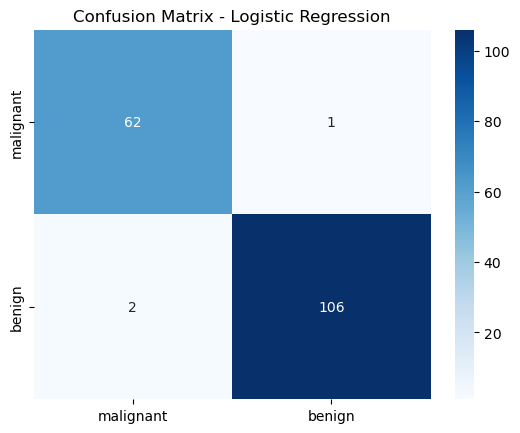

In [106]:
# Evaluate Logistic Regression
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


Decision Tree Classifier:
Accuracy: 0.9415204678362573
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



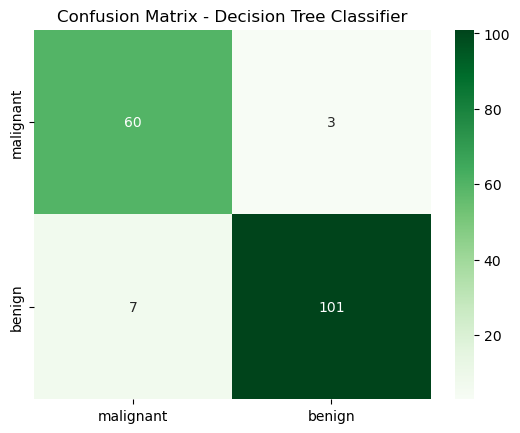

In [104]:
# Evaluate Decision Tree Classifier
print("\nDecision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()



Random Forest Classifier:
Accuracy: 0.9707602339181286
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



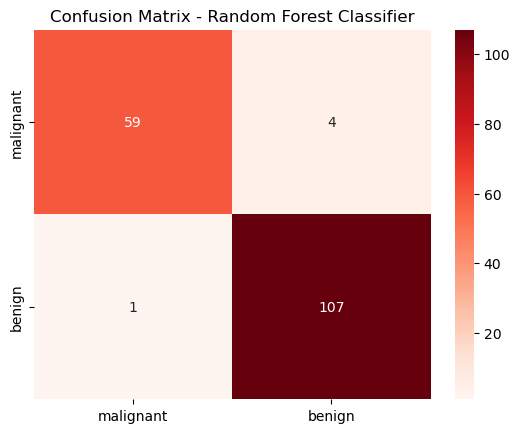

In [102]:
# Evaluate Random Forest Classifier
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()




Support Vector Machine:
Accuracy: 0.9766081871345029
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



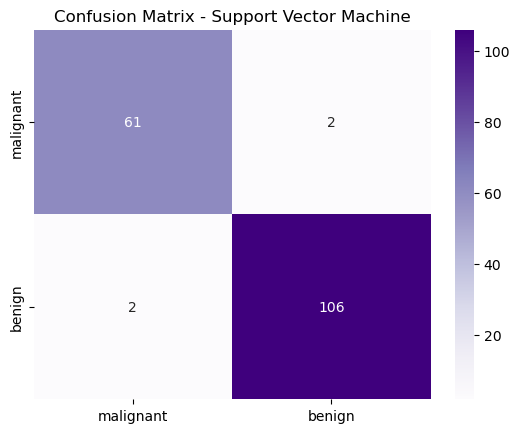

In [100]:
# Evaluate Support Vector Machine
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()


K-Nearest Neighbors:
Accuracy: 0.9590643274853801
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



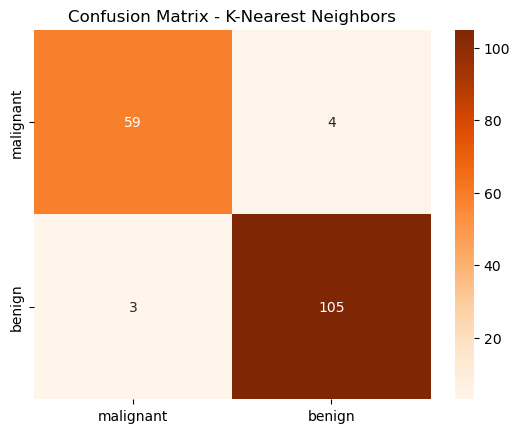

In [98]:
# Evaluate K-Nearest Neighbors
print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()


In [ ]:
# comparision
Best Model: Logistic Regression(Accuracy = 0.9824561403508771 
Worst Model: Decision Tree Classifier(Accuracy = 0.9415204678362573)